In [1]:
import ROOT

Welcome to JupyROOT 6.16/00


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
path_to_root_file = '/Users/hzanoli/cernbox/postdoc/DHFeCorrLocal/data_root_HMV0/'
configuration_name = 'D0'
folder_name = 'DHFeCorrelation_' + configuration_name

In [4]:
import glob

In [5]:
files = glob.glob(path_to_root_file+"*.root")
files

['/Users/hzanoli/cernbox/postdoc/DHFeCorrLocal/data_root_HMV0/16_child_6_014.root',
 '/Users/hzanoli/cernbox/postdoc/DHFeCorrLocal/data_root_HMV0/17_child_6_.root',
 '/Users/hzanoli/cernbox/postdoc/DHFeCorrLocal/data_root_HMV0/16_child_6_002.root',
 '/Users/hzanoli/cernbox/postdoc/DHFeCorrLocal/data_root_HMV0/17_child_11_002.root',
 '/Users/hzanoli/cernbox/postdoc/DHFeCorrLocal/data_root_HMV0/17_child_10_002.root',
 '/Users/hzanoli/cernbox/postdoc/DHFeCorrLocal/data_root_HMV0/16_child_8_.root',
 '/Users/hzanoli/cernbox/postdoc/DHFeCorrLocal/data_root_HMV0/17_child_10_014.root',
 '/Users/hzanoli/cernbox/postdoc/DHFeCorrLocal/data_root_HMV0/17_child_11_014.root',
 '/Users/hzanoli/cernbox/postdoc/DHFeCorrLocal/data_root_HMV0/16_child_6_018.root',
 '/Users/hzanoli/cernbox/postdoc/DHFeCorrLocal/data_root_HMV0/18_child_10_006.root',
 '/Users/hzanoli/cernbox/postdoc/DHFeCorrLocal/data_root_HMV0/17_child_9_006.root',
 '/Users/hzanoli/cernbox/postdoc/DHFeCorrLocal/data_root_HMV0/17_child_8_006.

In [39]:
import io

In [40]:
print(conversor_16)

In [122]:
conversor_16 = io.StringIO("Child Number	Period\n\
child 1	FILTER_p-p_208_LHC16d\n \
child 2	FILTER_p-p_208_LHC16e\n \
child 3	FILTER_p-p_208_LHC16g\n \
child 4	FILTER_p-p_208_LHC16h\n \
child 5	FILTER_p-p_208_LHC16j\n \
child 6	FILTER_p-p_208_LHC16k\n \
child 7	FILTER_p-p_208_LHC16l\n \
child 8	FILTER_p-p_208_LHC16o\n \
child 9	FILTER_p-p_208_LHC16p\n ")

conversor_17 = io.StringIO("Child Number	Period\n\
child 1	FILTER_p-p_208_LHC17c\n\
child 2	FILTER_p-p_208_LHC17e\n\
child 3	FILTER_p-p_208_LHC17f\n\
child 4	FILTER_p-p_212_LHC17g\n\
child 5	FILTER_p-p_208_LHC17h\n\
child 6	FILTER_p-p_208_LHC17i\n\
child 7	FILTER_p-p_208_LHC17j\n\
child 8	FILTER_p-p_208_LHC17k\n\
child 9	FILTER_p-p_208_LHC17l\n\
child 10	FILTER_p-p_208_LHC17m\n\
child 11	FILTER_p-p_208_LHC17o\n\
child 12	FILTER_p-p_208_LHC17r\n")

conversor_18 = io.StringIO("Child Number	Period\n\
child 1	FILTER_p-p_208_LHC18b\n\
child 2	FILTER_p-p_208_LHC18d\n\
child 3	FILTER_p-p_208_LHC18e\n\
child 4	FILTER_p-p_208_LHC18f\n\
child 5	FILTER_p-p_208_LHC18g\n\
child 6	FILTER_p-p_208_LHC18h\n\
child 7	FILTER_p-p_208_LHC18i\n\
child 8	FILTER_p-p_208_LHC18k\n\
child 9	FILTER_p-p_208_LHC18l\n\
child 10	FILTER_p-p_208_LHC18m\n\
child 11	FILTER_p-p_208_LHC18n\n\
child 12	FILTER_p-p_208_LHC18o\n\
child 13	FILTER_p-p_208_LHC18p\n")
        
table_convertsion = pd.concat([pd.read_csv(conversor_16, delimiter='	'), 
                              pd.read_csv(conversor_17, delimiter='	'),
                            pd.read_csv(conversor_18, delimiter='	')],ignore_index=True)
table_convertsion['Period'] = table_convertsion['Period'].apply(lambda x : x.split('LHC')[1])
table_convertsion['Child Number'] = table_convertsion['Child Number'].apply(lambda x: int(x.split('child ')[1]))
table_convertsion['Year'] = table_convertsion['Period'].apply(lambda x : x[:2])
table_convertsion.set_index(['Year','Child Number'],inplace=True)

In [120]:
n_events_with_trigger = list()
n_events_with_DHFe = list()

for f in files:
    file_root = ROOT.TFile.Open(f)
    file_root.cd('DHFeCorrelation_D0')
    list_event_qa = ROOT.gDirectory.Get('EventsQA')
    
    events_with_trigger = list_event_qa.FindObject('VertexZ_before')
    events_with_trigger.GetXaxis().SetRangeUser(-10.,10.)
    n_events = events_with_trigger.Integral()
    n_events_with_trigger.append(n_events)
    
    events_with_DHFe = list_event_qa.FindObject('VertexZ_after')
    events_with_DHFe.GetXaxis().SetRangeUser(-10.,10.)
    n_events_DHFe = events_with_DHFe.Integral()
    n_events_with_DHFe.append(n_events_DHFe)

In [125]:
year = [x.split('/')[-1].split('_')[0] for x in files]
child_number = [int(('child' + x.split('/')[-1].split('child')[1]).split('.')[0].split('_')[1]) for x in files]
event_counts = pd.DataFrame([year, child_number, n_events_with_trigger, n_events_with_DHFe]).T
event_counts.columns = ['Year', 'Child Number', 'Number of Events', 'Events with D and e']

Period
Year Child Number       
16   1               16d
     2               16e
     3               16g
     4               16h
     5               16j
     6               16k
     7               16l
     8               16o
     9               16p
17   1               17c
     2               17e
     3               17f
     4               17g
     5               17h
     6               17i
     7               17j
     8               17k
     9               17l
     10              17m
     11              17o
     12              17r
18   1               18b
     2               18d
     3               18e
     4               18f
     5               18g
     6               18h
     7               18i
     8               18k
     9               18l
     10              18m
     11              18n
     12              18o
     13              18p

In [130]:
event_counts = event_counts.groupby(['Year', 'Child Number']).sum().join(table_convertsion).reset_index()

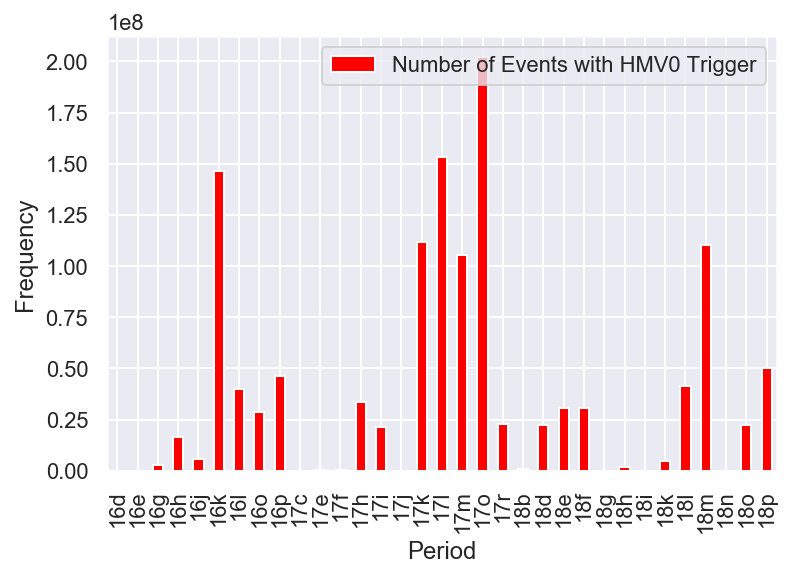

In [132]:
sns.set_context('notebook')
ax = event_counts.plot.bar(x='Period', y='Number of Events',
                           color='red', label='Number of Events with HMV0 Trigger')
ax.set_ylabel('Frequency')

ax.get_figure().savefig('All_event_with_trigger.pdf', bbox_inches='tight')

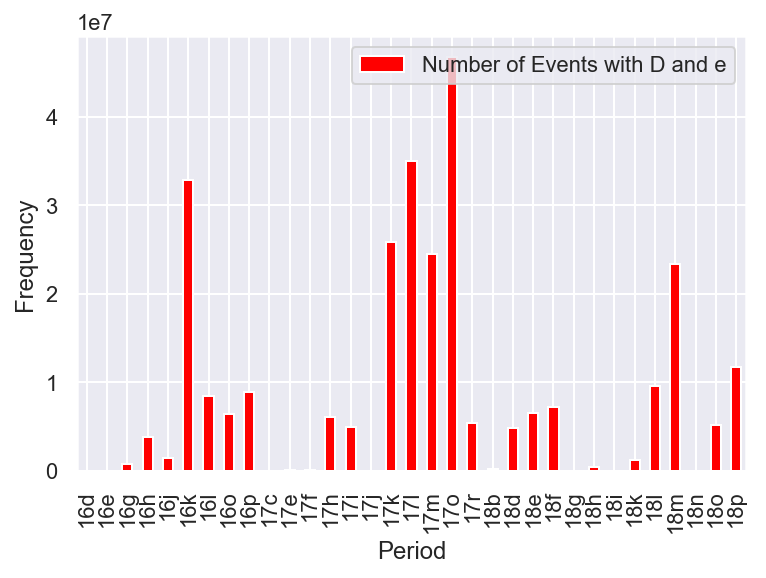

In [133]:
ax = event_counts.plot.bar(x='Period', y='Events with D and e', 
                           color='red', label='Number of Events with D and e')
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax.set_ylabel('Frequency')
ax.get_figure().savefig('All_event_with_De.pdf', bbox_inches='tight')

In [134]:
event_counts['Events with D and e'] = event_counts['Events with D and e'].astype(np.float32)
event_counts['Number of Events'] = event_counts['Number of Events'].astype(np.float32)
event_counts['ratio'] = event_counts['Events with D and e']/event_counts['Number of Events']

event_counts['ratio_error'] = event_counts['ratio']* np.sqrt( 
    (np.sqrt(event_counts['Events with D and e'])/event_counts['Events with D and e'])** 2  +
    (np.sqrt(event_counts['Number of Events'])/event_counts['Number of Events'])** 2)

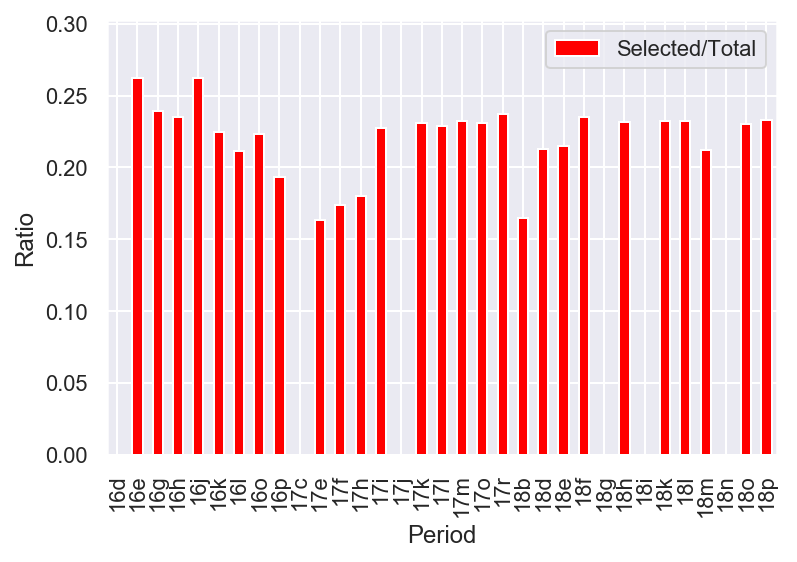

In [135]:
sns.set_context('notebook')
ax = event_counts.plot.bar(x='Period', y='ratio', color='red', label = 'Selected/Total')
ax.set_ylim(1.1*np.array(ax.get_ylim()))
ax.set_ylabel('Ratio')
ax.get_figure().savefig('ratio.pdf', bbox_inches='tight')

In [145]:
print('Events with D meson and electrons')
print('{0:.1f} M events'.format(event_counts['Events with D and e'].sum()/(10**6)))

Events with D meson and electrons
281.2 M events


In [146]:
print('All Events')
print('{0:.1f} M events'.format(event_counts['Number of Events'].sum()/(10**6)))

All Events
1252.6 M events
